## Classification using KNN

In [13]:
from lib import KNN

In [14]:
# Run some setup code for this notebook.

import random
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
import pandas as pd

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Let's gather some data...

In [15]:
dataset = datasets.load_iris(as_frame=True) # for pandas dataset

In [16]:
# Convert dataset to a Pandas dataframe
dataset = pd.DataFrame(data= np.c_[dataset['data'], dataset['target']],
                       columns= dataset['feature_names'] + ['target'])

In [17]:
dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


### Note

As you can see we are using the same data as last time for uniformization purpose.

In [18]:
# Labels
targets = dataset["target"]
labels = targets.values
# Xs
dataset = dataset.drop(columns=["target"])
X = dataset.values

# Set the split value
split_value = 0.75
X_train = X[:int(split_value * len(X))]
X_test = X[int(split_value * len(X)):]

In [19]:
print(f"Samples in train dataset: {len(X_train)}")
print(f"Samples in test dataset: {len(X_test)}")

Samples in train dataset: 112
Samples in test dataset: 38


In [20]:
X_train[0].shape

(4,)

In [21]:
# We need the split for labels also
y_train = labels[:int(split_value * len(X))]
y_test = labels[int(split_value * len(X)):]

In [22]:
print(f"Labels in train dataset: {len(y_train)}")
print(f"Labels in test dataset: {len(y_test)}")

Labels in train dataset: 112
Labels in test dataset: 38


In [23]:
X_train.T.shape

(4, 112)

In [24]:
X_test

array([[6.8, 3. , 5.5, 2.1],
       [5.7, 2.5, 5. , 2. ],
       [5.8, 2.8, 5.1, 2.4],
       [6.4, 3.2, 5.3, 2.3],
       [6.5, 3. , 5.5, 1.8],
       [7.7, 3.8, 6.7, 2.2],
       [7.7, 2.6, 6.9, 2.3],
       [6. , 2.2, 5. , 1.5],
       [6.9, 3.2, 5.7, 2.3],
       [5.6, 2.8, 4.9, 2. ],
       [7.7, 2.8, 6.7, 2. ],
       [6.3, 2.7, 4.9, 1.8],
       [6.7, 3.3, 5.7, 2.1],
       [7.2, 3.2, 6. , 1.8],
       [6.2, 2.8, 4.8, 1.8],
       [6.1, 3. , 4.9, 1.8],
       [6.4, 2.8, 5.6, 2.1],
       [7.2, 3. , 5.8, 1.6],
       [7.4, 2.8, 6.1, 1.9],
       [7.9, 3.8, 6.4, 2. ],
       [6.4, 2.8, 5.6, 2.2],
       [6.3, 2.8, 5.1, 1.5],
       [6.1, 2.6, 5.6, 1.4],
       [7.7, 3. , 6.1, 2.3],
       [6.3, 3.4, 5.6, 2.4],
       [6.4, 3.1, 5.5, 1.8],
       [6. , 3. , 4.8, 1.8],
       [6.9, 3.1, 5.4, 2.1],
       [6.7, 3.1, 5.6, 2.4],
       [6.9, 3.1, 5.1, 2.3],
       [5.8, 2.7, 5.1, 1.9],
       [6.8, 3.2, 5.9, 2.3],
       [6.7, 3.3, 5.7, 2.5],
       [6.7, 3. , 5.2, 2.3],
       [6.3, 2

## Let's create a simple classifier and train it

In [25]:
clf = KNN()

In [26]:
clf.set_values(X=X_train, y=y_train)

In [27]:
preds = clf.predict(X=X_test, k=2)

dist [[4.85386444 4.90204039 5.06951674 ... 1.0198039  0.54772256 0.57445626]
 [4.19046537 4.13400532 4.29185275 ... 2.2181073  1.06770783 0.79372539]
 [4.41701257 4.40227214 4.54422711 ... 1.9        0.9        0.81240384]
 ...
 [4.45982062 4.49888875 4.66154481 ... 1.3820275  0.2236068  0.34641016]
 [4.65080638 4.71805044 4.84871117 ... 1.25299641 0.55677644 0.83666003]
 [4.14004831 4.15331193 4.29883705 ... 1.88148877 0.66332496 0.6244998 ]]


In [127]:
print(preds)

[2. 1. 1. 2. 2. 2. 2. 1. 2. 1. 2. 1. 2. 2. 1. 1. 2. 2. 2. 2. 2. 1. 1. 2.
 2. 2. 1. 2. 2. 1. 1. 2. 2. 2. 1. 1. 2. 1.]


### Let's plot the clusters 

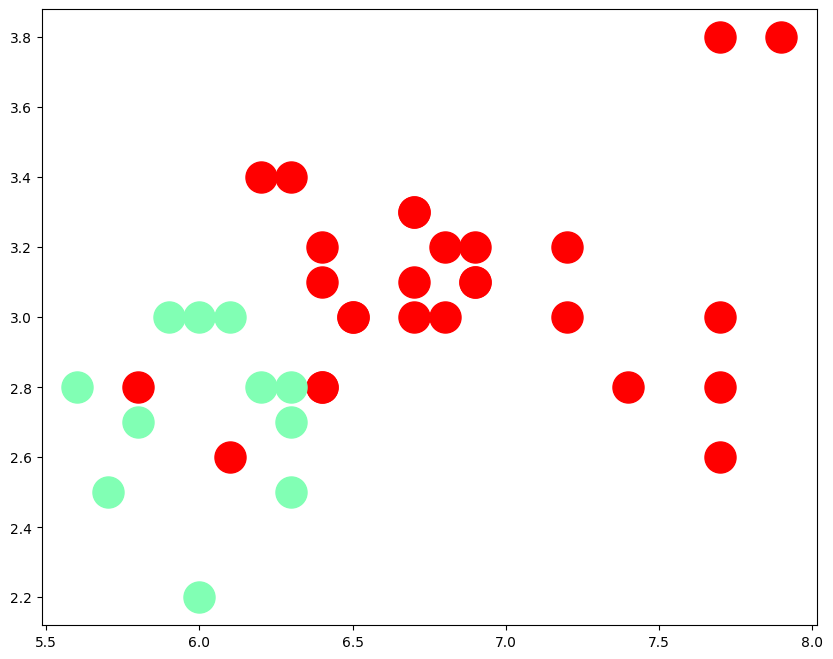

In [125]:
colors = plt.cm.rainbow(np.linspace(0, 1, 3))

x = X_test[:, 0]
y = X_test[:, 1]

for (_x, _y, _p) in zip(x, y, preds):
    plt.scatter(_x, _y, s=500, c=[colors[int(_p)]])

plt.show()
